In [10]:
#first task is to import some important libraries pandas ... numpy ... matplotlib ... 
import pandas as pd # for adding tabular
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
#Linear regression is a fundamental statistical technique used to model the relationship between one or more independent
#variables (features) and a dependent variable (target). 
#It assumes that there is a linear relationship between the independent variables and the dependent variable.
import plotly.graph_objs as go  # for graphical Representation 
from plotly.offline import plot  

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
tesla = pd.read_csv('tesla.csv')        # adj adjusted closing price 
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
tesla.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [9]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [10]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [11]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

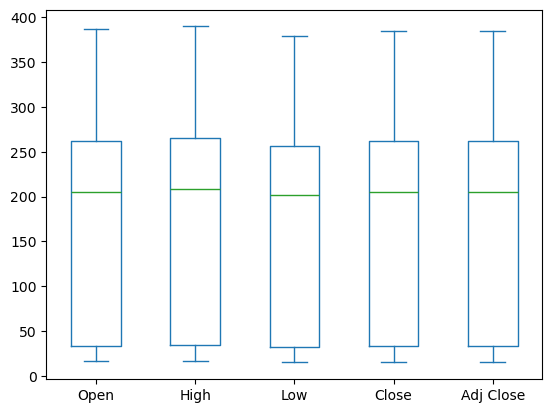

In [12]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')


In [14]:
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

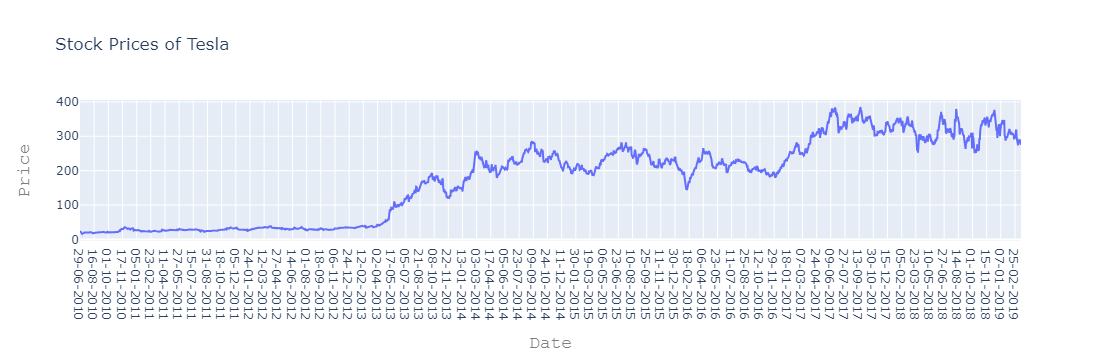

In [18]:
#plot(plot) #plotting offline
iplot(plot)

In [16]:
# Building the regression model
from sklearn.model_selection import train_test_split 

#For preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse   # To check the accuracy of the preiction 
from sklearn.metrics import r2_score      #Used to measure how well the predictions of a regression model match the observed data.

In [24]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1) 
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)   

In [25]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [29]:
#Creating a linear model : basically linear regression is a supervised learning algorithm which is used to predict the outcome of the cont
lm = LinearRegression()  
lm.fit(X_train, Y_train)

LinearRegression()

In [31]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

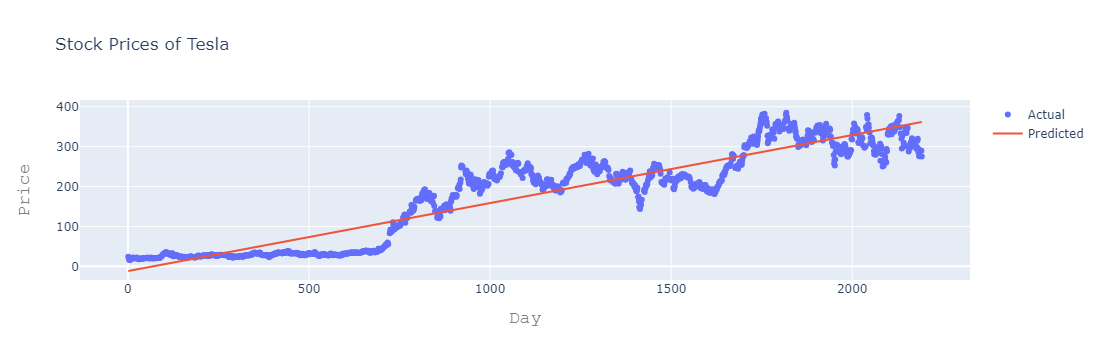

In [32]:
iplot(plot2)

In [33]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244576
MSE       1821.3833862936174	1780.9875394188446



In [ ]:

#MSE:Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values.
# r2_score
#The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model.
#Train : Train data is basically the trained data by the modal 
#Test : Test data is basically used after the train data been trained unitl  unless this data will not be used.

#MinMaxScaler: This scaler scales and translates each feature individually such that it is in the given range, 
#typically between zero and one. It's sensitive to outliers, meaning it might not work well if your data has outliers.

#StandardScaler: This scaler standardizes features by removing the mean and scaling to unit variance.
#It's less sensitive to the presence of outliers compared to MinMaxScaler.

In [1]:
# Step 1: Portfolio Construction

# Define the assets and their initial allocations
portfolio_assets = ['AAPL', 'GOOGL', 'MSFT']  # Example assets (Apple, Google, Microsoft)
initial_allocations = [0.4, 0.4, 0.2]  # Example initial allocations (40%, 40%, 20%)

# Total initial investment amount
initial_investment = 10000  # Example initial investment amount ($10,000)

# Calculate the initial investment in each asset based on allocations
initial_investment_per_asset = [allocation * initial_investment for allocation in initial_allocations]

# Display the initial investment per asset
for asset, investment in zip(portfolio_assets, initial_investment_per_asset):
    print(f"Initial investment in {asset}: ${investment:.2f}")


Initial investment in AAPL: $4000.00
Initial investment in GOOGL: $4000.00
Initial investment in MSFT: $2000.00


In [5]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Step 2: Data Retrieval

import yfinance as yf

# Define a function to fetch historical price data for a given asset
def fetch_historical_data(asset, start_date, end_date):
    data = yf.download(asset, start=start_date, end=end_date)
    return data['Close']  # Return the 'Close' prices

# Define the start and end dates for the historical data
start_date = '2020-01-01'
end_date = '2020-12-31'

# Fetch historical price data for each asset
historical_data = {}
for asset in portfolio_assets:
    historical_data[asset] = fetch_historical_data(asset, start_date, end_date)

# Display the first few rows of the fetched data for one of the assets (e.g., AAPL)
print(historical_data['AAPL'].head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64


In [4]:
fetch_historical_data

<function __main__.fetch_historical_data(asset, start_date, end_date)>

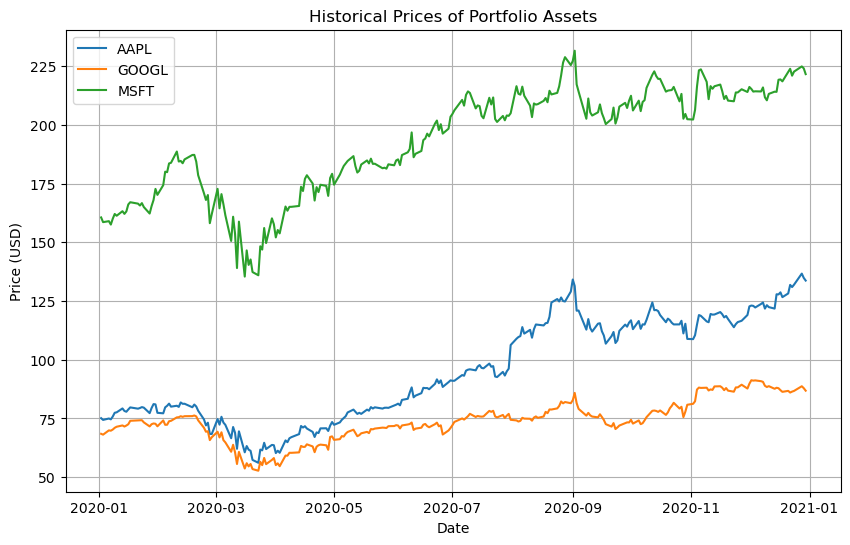

In [9]:
# Step 3: Visualization

import matplotlib.pyplot as plt

# Plot the historical prices for each asset
plt.figure(figsize=(10, 6))
for asset in portfolio_assets:
    plt.plot(historical_data[asset], label=asset)

# Add labels and title
plt.title('Historical Prices of Portfolio Assets')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


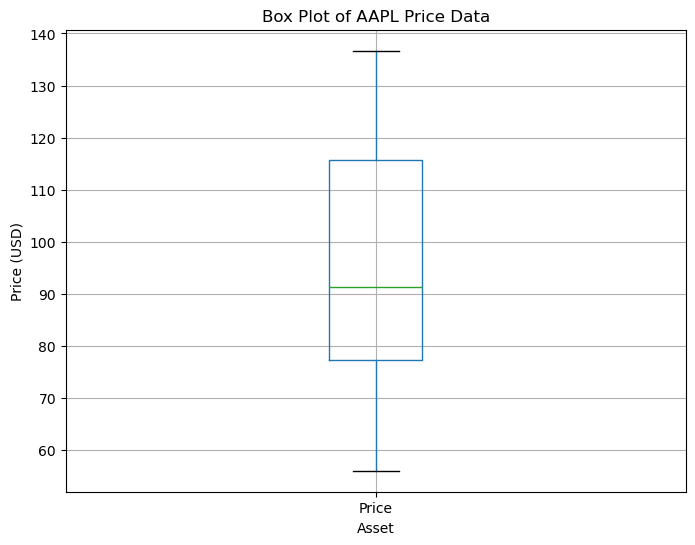

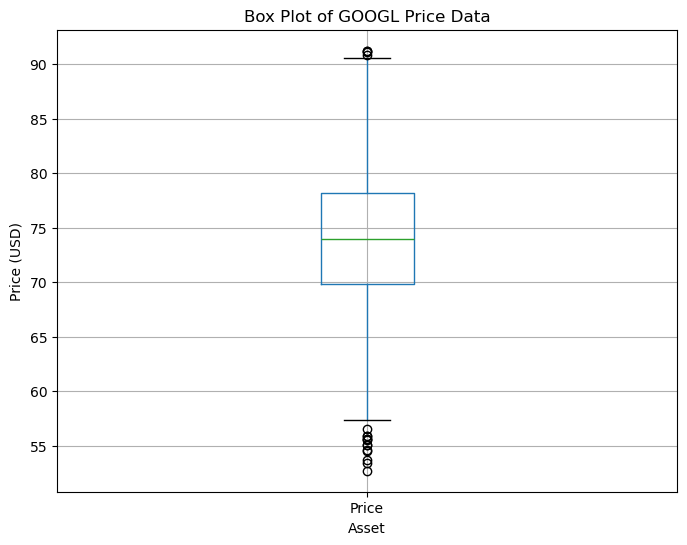

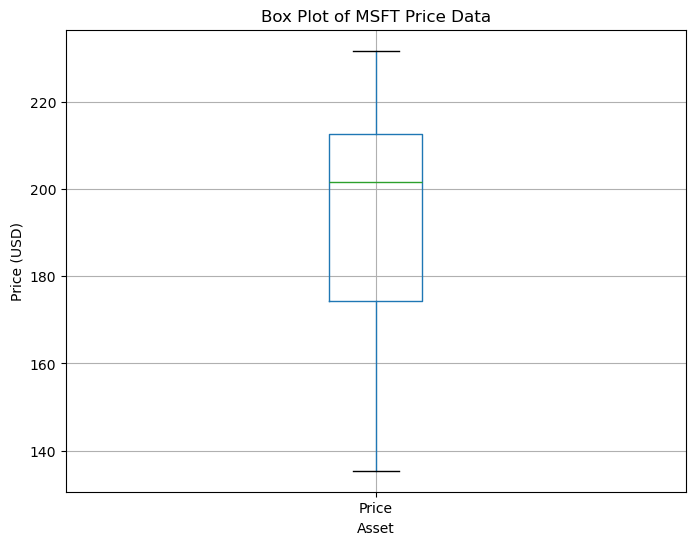

In [12]:
# Create a box plot for the selected columns
for asset in portfolio_assets:
    asset_data = historical_data[asset]  # Retrieve historical data for the current asset
    asset_data_df = asset_data.to_frame()  # Convert the Series to a DataFrame
    asset_data_df.columns = ['Price']  # Rename the column to 'Price'
    asset_data_df.boxplot(column=['Price'], figsize=(8, 6))  # Create the box plot
    plt.title(f'Box Plot of {asset} Price Data')
    plt.xlabel('Asset')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()




In [13]:
# Define a function to calculate daily returns
def calculate_daily_returns(data):
    return data.pct_change()

# Calculate daily returns for each asset
daily_returns = {}
for asset in portfolio_assets:
    daily_returns[asset] = calculate_daily_returns(historical_data[asset])


In [14]:

# Display the first few rows of daily returns for one of the assets (e.g., AAPL)
print("Daily Returns for AAPL:")
print(daily_returns['AAPL'].head())

Daily Returns for AAPL:
Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: Close, dtype: float64


In [15]:
# Step 2: Calculate Cumulative Returns

# Define a function to calculate cumulative returns
def calculate_cumulative_returns(data):
    return (1 + data).cumprod() - 1

# Calculate cumulative returns for each asset
cumulative_returns = {}
for asset in portfolio_assets:
    cumulative_returns[asset] = calculate_cumulative_returns(daily_returns[asset])

# Display the last few rows of cumulative returns for one of the assets (e.g., AAPL)
print("Cumulative Returns for AAPL:")
print(cumulative_returns['AAPL'].tail())

Cumulative Returns for AAPL:
Date
2020-12-23    0.744099
2020-12-24    0.757550
2020-12-28    0.820410
2020-12-29    0.796171
2020-12-30    0.780856
Name: Close, dtype: float64


In [19]:
# Step 3: Calculate Rolling Statistics

# Define window size for rolling statistics
window_size = 30  # Example window size (30 days)

# Calculate moving average and volatility for each asset
rolling_statistics = {}
for asset in portfolio_assets:
    # Moving average
    rolling_statistics[f'{asset}_moving_avg'] = historical_data[asset].rolling(window=window_size).mean()
    
    # Volatility (rolling standard deviation of daily returns)
    rolling_statistics[f'{asset}_volatility'] = daily_returns[asset].rolling(window=window_size).std()

# Display the last few rows of rolling statistics for one of the assets (e.g., AAPL)
print("Rolling Statistics for AAPL:")
print(rolling_statistics['AAPL_moving_avg'].tail())
print(rolling_statistics['AAPL_volatility'].tail())



Rolling Statistics for AAPL:
Date
2020-12-23    122.093333
2020-12-24    122.509333
2020-12-28    123.092000
2020-12-29    123.612333
2020-12-30    124.059666
Name: Close, dtype: float64
Date
2020-12-23    0.016604
2020-12-24    0.015872
2020-12-28    0.016886
2020-12-29    0.017190
2020-12-30    0.017323
Name: Close, dtype: float64


In [21]:
# Step 4: Correlation Analysis
import pandas as pd 
# Compute the correlation matrix for daily returns of the assets
correlation_matrix = pd.DataFrame({asset: daily_returns[asset] for asset in portfolio_assets}).corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           AAPL     GOOGL      MSFT
AAPL   1.000000  0.752259  0.839192
GOOGL  0.752259  1.000000  0.857876
MSFT   0.839192  0.857876  1.000000


In [24]:
pip install import numpy as np
import cvxpy as cp

# Step 4: Portfolio Optimization

# Define expected returns and covariance matrix
expected_returns = np.array([0.05, 0.08, 0.10])  # Example expected returns for each asset
covariance_matrix = np.array([[0.05, 0.02, 0.01],
                              [0.02, 0.06, 0.03],
                              [0.01, 0.03, 0.08]])  # Example covariance matrix

# Define portfolio variables
num_assets = len(expected_returns)
weights = cp.Variable(num_assets)  # Portfolio weights

# Define objective function (maximize Sharpe ratio)
risk_free_rate = 0.03  # Example risk-free rate
objective = cp.Maximize((expected_returns - risk_free_rate) @ weights - cp.quad_form(weights, covariance_matrix))

# Define constraints (sum of weights equals 1 and non-negative weights)
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get optimized portfolio weights
optimized_weights = weights.value

# Display optimized portfolio weights
print("Optimized Portfolio Weights:")
print(optimized_weights)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Solve the optimization problem with the ECOS solver (or any other desired solver)
problem.solve(solver=cp.ECOS)

# Alternatively, you can specify Clarabel as the solver (assuming it's available)
# problem.solve(solver=cp.CLARABEL)


-inf

In [33]:
import numpy as np
import cvxpy as cp 
#CVXPY is a Python library for convex optimization

# Step 4: Portfolio Optimization

# Define expected returns and covariance matrix
expected_returns = np.array([0.05, 0.08, 0.10])  # Example expected returns for each asset
covariance_matrix = np.array([[0.05, 0.02, 0.01],
                              [0.02, 0.06, 0.03],
                              [0.01, 0.03, 0.08]])  # Example covariance matrix

# Define portfolio variables
num_assets = len(expected_returns)
weights = cp.Variable(num_assets)  # Portfolio weights

# Define objective function (maximize Sharpe ratio)
risk_free_rate = 0.03  # Example risk-free rate
objective = cp.Maximize((expected_returns - risk_free_rate) @ weights - cp.quad_form(weights, covariance_matrix))

# Define constraints (sum of weights equals 1 and non-negative weights)
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get optimized portfolio weights
optimized_weights = weights.value

# Display optimized portfolio weights
print("Optimized Portfolio Weights:")
print(optimized_weights)


Optimized Portfolio Weights:
[0.23076923 0.32692308 0.44230769]
